In [2]:
import pandas as pd
import random 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene


plt.rcParams["figure.figsize"] = (10,8) 

### El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Cada asunción la deberéis testar de forma visual y analítica.

In [4]:
df = pd.read_pickle('../datos/possum_limpio.pkl')

In [5]:
df.head(2)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


### Normalidad (ya la deberíais haber evaluado)

Aceptamos la H0 porque el p_valor hayado en el test de shapiro es mayor que 0.05. Por lo tanto la distribución de nuestra variable es Normal. Esto se confirma con el histograma que sigue.


In [6]:
# test de shapiro
stats.shapiro(df["totlngth"])


ShapiroResult(statistic=0.9839882850646973, pvalue=0.24401579797267914)

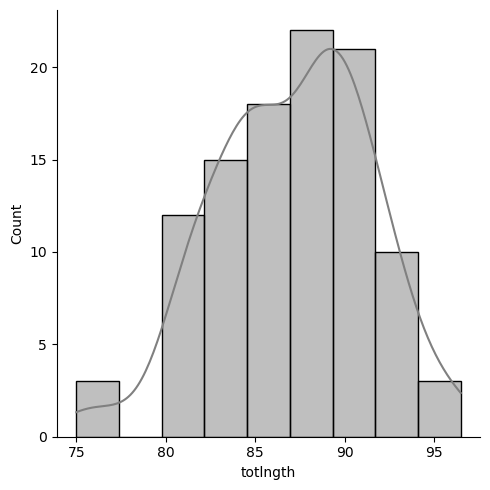

In [19]:
# representación visual de la distribución, mediante un displot. 
sns.displot(df["totlngth"], kde = True, color = "grey");

### Homogeneidad de varianzas

Según el análisis visual, nos parece que nuestras variables sí que cumplen con la asunción de homocedasticidad. 

La nube de puntos se encuentra uniformemente distribuida a lo largo de la recta. 


No aplicamos el test de Levene, para la comprobación anaítica de la H0, porque es un test para comparar varianza entre grupos, y nosotras no tenemos grupos. 

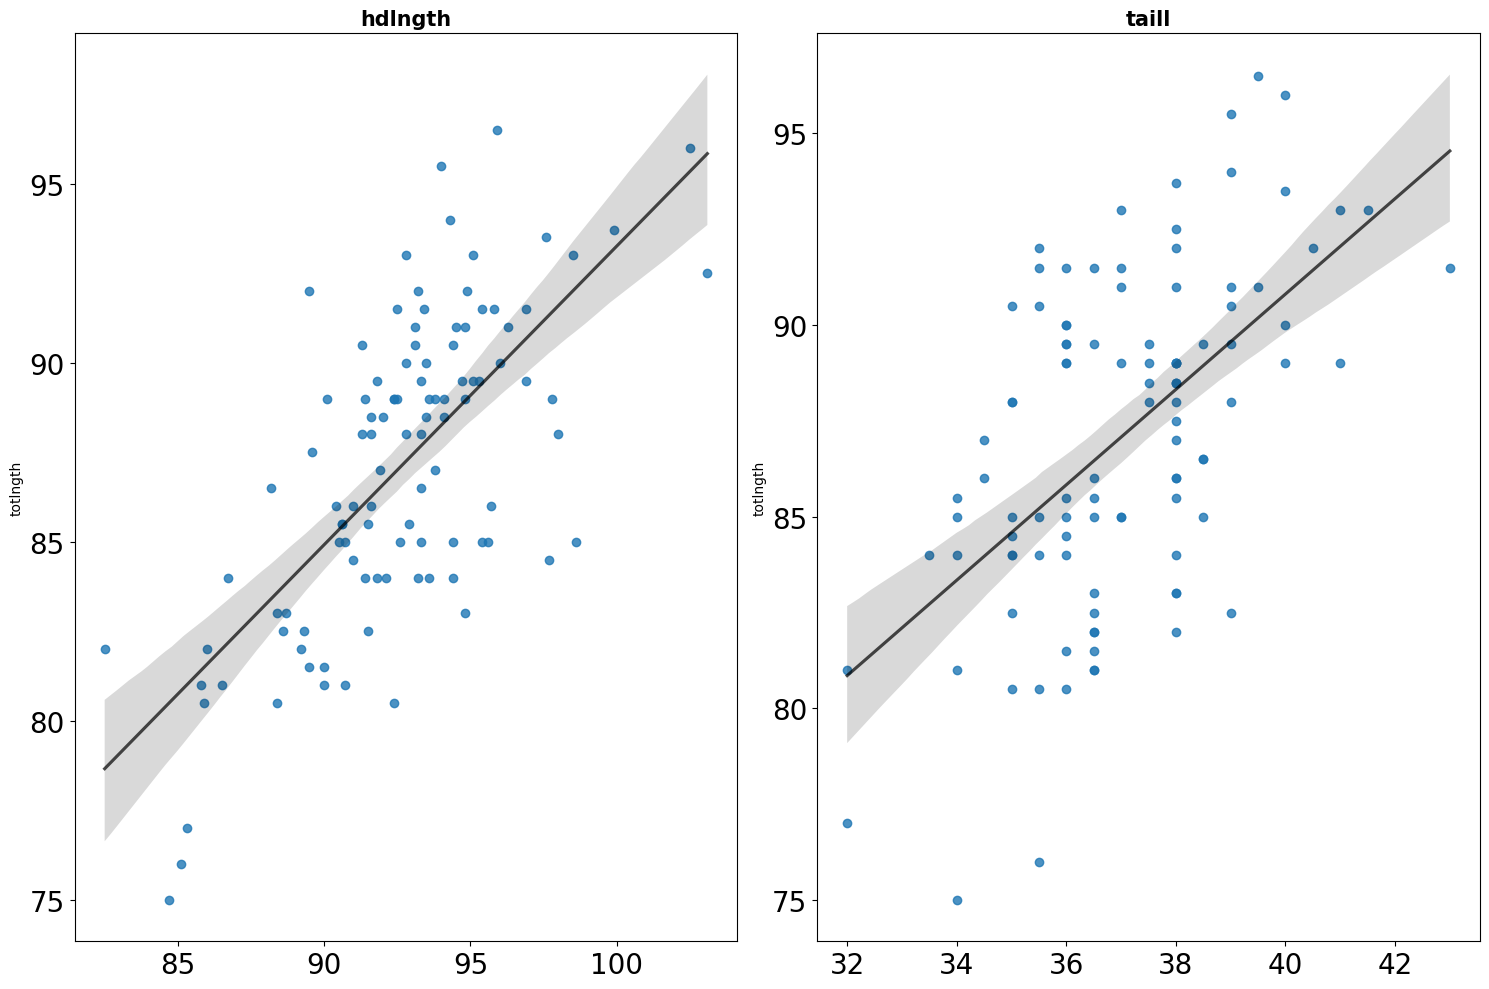

In [15]:
# iniciamos los subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))

# hemos creado una gráfica con varios subplots. Si queremos automatizar el proceso de relleno de cada uno de los plots
## podemos usar el método .flat. Lo que hace es aplanar los ejes para que queden en una única dimensión
## y luego los vamos rellenando. 
axes = axes.flat

# seleccionamos las columnas que queremos graficar
columnas_numeric = df[["hdlngth", "taill"]]
columnas_numeric = columnas_numeric.columns

# iniciamos un for loop para no tener que escribir la misma línea de código muchas veces
for i, colum in enumerate(columnas_numeric): 
    sns.regplot(
        data = df,
        x = colum,
        y = 'totlngth',
        #color = lista_colores[i],
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
    
    # establecemos el título de cada gráfica
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")

    # establacemos el tamaño de la letras de los ejes
    axes[i].tick_params(labelsize = 20)

    # establecemos que no queremos que aparezca nada en el eje x
    axes[i].set_xlabel("")
    
# ajustamos el tamaño de cada subplot para que no se vean superpuestos. 
fig.tight_layout();

### Independencia de las variables

Nos decidimos por la variable "hdlngth" y "taill" ya que ambas tienen una alta correlación con nuestra variable respuesta, pero tienen baja correlación entre ellas, lo cual quiere decir que son independientes. 

Utilizamos un analisis visual en forma de heatmap y hayamos la matriz de correlación entre variables para comprobar esta correlación. 


No utilizamos el test de chi-square porque nuestras variables son numéricas y no categóricas. 

In [7]:
df.corr()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
age,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716
chest,0.334209,0.631498,0.629737,0.577890,0.174997,0.450590,0.199230,0.149338,1.000000,0.606170
belly,0.354298,0.562663,0.451838,0.519465,0.294493,0.302584,0.066527,0.235716,0.606170,1.000000


/tmp/ipykernel_17699/2762938601.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


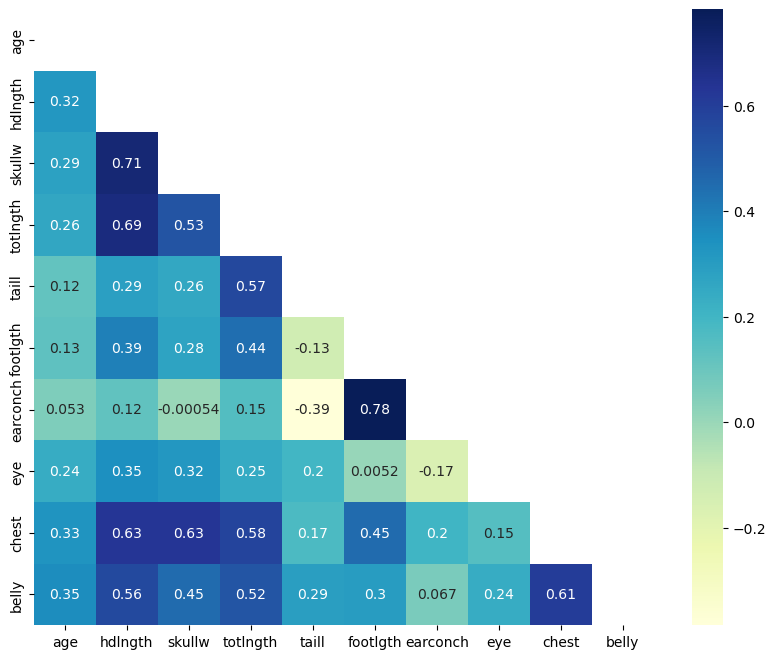

In [17]:
#hacemos el heatmap

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(),
cmap = "YlGnBu", 
mask = mask, # incorporamos la máscara en nuestro plot
annot = True);
